In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

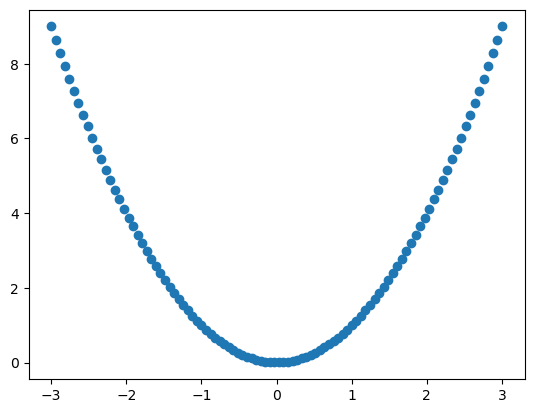

In [56]:
x = torch.linspace(-3, 3, 100)
y = x.square()

plt.scatter(x, y)

In [71]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
)

optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

In [113]:
def train(dataloader, model, loss_fn, optimizer):
    device = 'cpu'
    
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

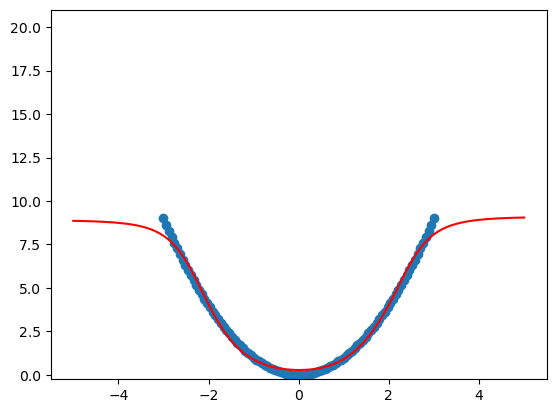

In [134]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.linspace(-3, 3, 100).view([-1, 1])
        self.label = self.data.square()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

from torch.utils.data import DataLoader

train_dataloader = DataLoader(MyDataset(), batch_size=100, shuffle=True)

model = nn.Sequential(
    nn.Linear(1, 4),
    nn.Tanh(),
    nn.Linear(4, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
loss_fn = nn.MSELoss()

for _ in range(3000):
    train(train_dataloader, model, loss_fn, optimizer)

x = torch.linspace(-5, 5, 100)

with torch.no_grad():
    pred = model(x.view([-1, 1]))


plt.plot(x, pred, color='red')

x = torch.linspace(-3, 3, 100)
y = x.square()

plt.scatter(x, y)
plt.ylim(-0.25, 21)
plt.show()

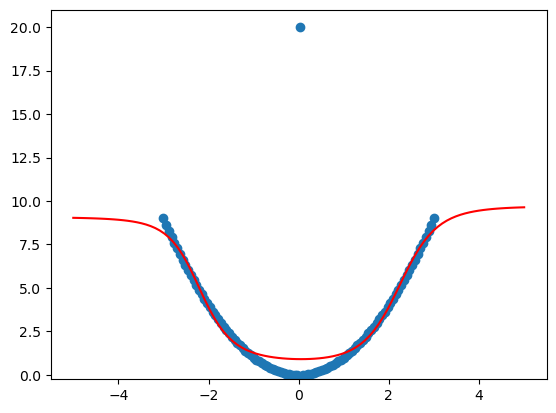

In [135]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.linspace(-3, 3, 100).view([-1, 1])
        self.label = self.data.square()
        self.label[50] = 20

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

from torch.utils.data import DataLoader

train_dataloader = DataLoader(MyDataset(), batch_size=100, shuffle=True)

model = nn.Sequential(
    nn.Linear(1, 4),
    nn.Tanh(),
    nn.Linear(4, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
loss_fn = nn.MSELoss()

for _ in range(3000):
    train(train_dataloader, model, loss_fn, optimizer)

x = torch.linspace(-5, 5, 100)

with torch.no_grad():
    pred = model(x.view([-1, 1]))
    
plt.plot(x, pred, color='red')

x = torch.linspace(-3, 3, 100)
y = x.square()
y[50] = 20

plt.scatter(x, y)
plt.ylim(-0.25, 21)
plt.show()

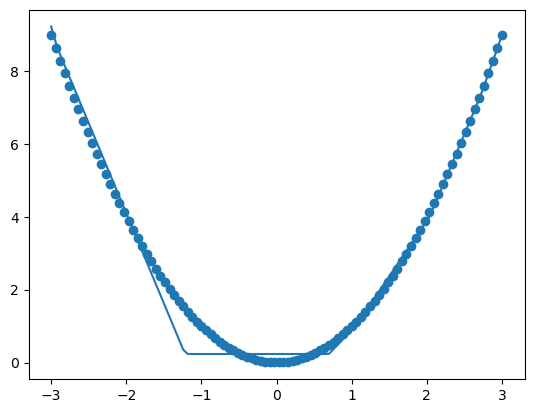

In [112]:
with torch.no_grad():
    pred = net(x.view([-1, 1]))
    
plt.plot(x, pred)
plt.scatter(x, y)